In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

In [3]:
train_df.shape

(1966, 9)

In [4]:
test_df.shape

(312, 8)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [6]:
train_df.describe()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,1954.000000,1948.000000,1953.000000,1948.000000,1953.000000,1948.000000,1955.000000,1957.000000
mean,78683.621801,1.510267,1.825397,27.965400,99.491039,2.015914,115.150384,11.862892
std,2924.115709,0.500023,0.399449,7.327616,16.774665,0.187579,46.271615,9.756713
min,73564.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76194.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.800000
50%,78717.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.030000
75%,81217.000000,2.000000,2.000000,31.300000,104.000000,2.000000,131.000000,14.480000
max,83727.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [7]:
train_df.head(3)

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult


In [8]:

# Check for duplicates
print("Duplicates before removal:", train_df.duplicated().sum())

# Remove duplicate rows
train_df.drop_duplicates(inplace=True)

print("Duplicates after removal:", train_df.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


In [9]:
train_df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [10]:
test_df.isnull().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [11]:
train_df = train_df.dropna()

In [12]:
train_df.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


In [13]:
test_df = test_df.dropna()
X_test = test_df[features]

NameError: name 'features' is not defined

In [14]:
test_df.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


In [15]:
train_df.shape

(1841, 9)

In [16]:
test_df.shape

(301, 8)

In [17]:
train_df = train_df[train_df['age_group'].isin(['Adult', 'Senior'])].copy()
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

In [18]:
def remove_outliers(df, column):
    before_rows = df.shape[0]
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower) & (df[column] <= upper)]
    after_rows = df_clean.shape[0]
    removed = before_rows - after_rows
    print(f"Removed {removed} outliers from '{column}'")
    print(f"Dataset after outlier removal from '{column}': {df_clean.shape}")
    return df_clean

In [19]:
for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    train_df = remove_outliers(train_df, col)

Removed 71 outliers from 'BMXBMI'
Dataset after outlier removal from 'BMXBMI': (1770, 9)
Removed 83 outliers from 'LBXGLU'
Dataset after outlier removal from 'LBXGLU': (1687, 9)
Removed 62 outliers from 'LBXGLT'
Dataset after outlier removal from 'LBXGLT': (1625, 9)
Removed 93 outliers from 'LBXIN'
Dataset after outlier removal from 'LBXIN': (1532, 9)


In [20]:
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']
X_train_raw = train_df[features]
y = train_df['age_group']
X_test_raw = test_df[features]

In [21]:
imputer = SimpleImputer(strategy='mean')

X_all = imputer.fit_transform(X_train_raw)
X_test = imputer.transform(X_test_raw)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print("\n Accuracy on validation set:", round(accuracy * 100, 2), "%")
print("\n Classification Report:\n", classification_report(y_val, y_pred))


 Accuracy on validation set: 85.67 %

 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       262
           1       0.60      0.07      0.12        45

    accuracy                           0.86       307
   macro avg       0.73      0.53      0.52       307
weighted avg       0.82      0.86      0.80       307



In [25]:
model.fit(X_all, y)
test_predictions = model.predict(X_test)

In [26]:
submission_df = pd.DataFrame({'age_group': test_predictions})
submission_df.to_csv("submission.csv", index=False)

In [27]:
submission_df

,age_group
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:28:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1048
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:28:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:28:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 252, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

 5-Fold CV Accuracy: 0.7884 ± 0.0124

 Validation Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       340
           1       0.28      0.47      0.35        51

    accuracy                           0.77       391
   macro avg       0.60      0.65      0.61       391
weighted avg       0.83      0.77      0.80       391



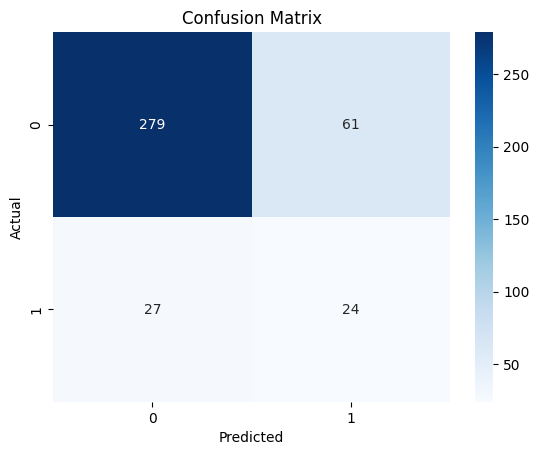

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Final submission.csv created with shape: (312, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [28]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Load data
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Target encode
train_df = train_df[train_df['age_group'].isin(['Adult', 'Senior'])].copy()
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

# Feature engineering
train_df['GLU_IN_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
test_df['GLU_IN_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)

train_df['BMI_Category'] = pd.cut(train_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])
test_df['BMI_Category'] = pd.cut(test_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

train_df = pd.get_dummies(train_df, columns=['BMI_Category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['BMI_Category'], drop_first=True)

# Select feature columns
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
            'LBXGLT', 'LBXIN', 'GLU_IN_Ratio'] + \
           [col for col in train_df.columns if "BMI_Category_" in col]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(train_df[features])
X_test = imputer.transform(test_df[features])
y = train_df['age_group']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Feature selection (top 8 features)
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Define individual models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('lr', lr)
], voting='soft')

# Train the ensemble
voting_clf.fit(X_train_bal, y_train_bal)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_selected, y, cv=5, scoring='accuracy')
print(f"\n 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Validation performance
y_val_pred = voting_clf.predict(X_val)
print("\n Validation Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final training on full data
X_full_bal, y_full_bal = smote.fit_resample(X_selected, y)
voting_clf.fit(X_full_bal, y_full_bal)

# Test predictions
final_predictions = voting_clf.predict(X_test_selected)

# Submission
submission = pd.DataFrame({'age_group': final_predictions})
submission.to_csv("submission.csv", index=False)
print(" Final submission.csv created with shape:", submission.shape)

38

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1310, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1057
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 252, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



 5-Fold CV Accuracy: 0.7884 ± 0.0124

 Validation Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       328
           1       0.28      0.44      0.34        63

    accuracy                           0.72       391
   macro avg       0.58      0.61      0.58       391
weighted avg       0.78      0.72      0.75       391



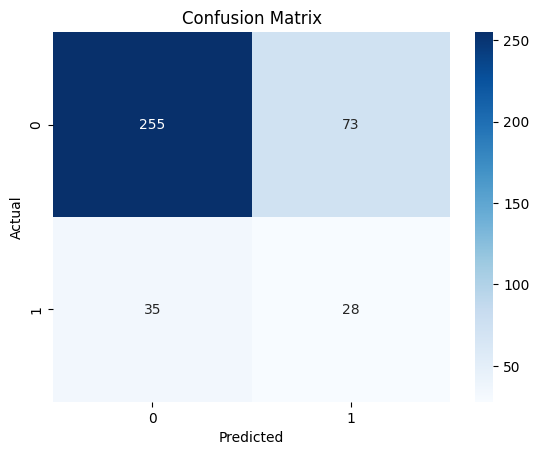

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:29:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1050
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Final submission.csv created with shape: (312, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
# ==================== IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# ==================== LOAD DATA ====================
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# ==================== TARGET ENCODING ====================
# Only keep Adult and Senior (0 = Adult, 1 = Senior)
train_df = train_df[train_df['age_group'].isin(['Adult', 'Senior'])].copy()
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

# ==================== FEATURE ENGINEERING ====================
for df in [train_df, test_df]:
    df['GLU_IN_Ratio'] = df['LBXGLU'] / (df['LBXIN'] + 1)
    df['BMI_Category'] = pd.cut(df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

# One-hot encode BMI_Category (drop first to avoid dummy trap)
train_df = pd.get_dummies(train_df, columns=['BMI_Category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['BMI_Category'], drop_first=True)

# Ensure test_df has same columns as train_df
for col in train_df.columns:
    if "BMI_Category_" in col and col not in test_df.columns:
        test_df[col] = 0

# ==================== FEATURE SELECTION ====================
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
            'LBXGLT', 'LBXIN', 'GLU_IN_Ratio'] + \
           [col for col in train_df.columns if "BMI_Category_" in col]

# ==================== MISSING VALUE IMPUTATION ====================
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(train_df[features])
X_test = imputer.transform(test_df[features])
y = train_df['age_group']

# ==================== FEATURE SCALING ====================
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# ==================== TOP-K FEATURE SELECTION ====================
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)

# ==================== TRAIN-VALIDATION SPLIT ====================
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# ==================== DATA BALANCING USING SMOTE ====================
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# ==================== MODEL DEFINITIONS ====================
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# ==================== VOTING ENSEMBLE ====================
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('lr', lr)
], voting='soft')

# ==================== TRAINING ENSEMBLE MODEL ====================
voting_clf.fit(X_train_bal, y_train_bal)

# ==================== CROSS-VALIDATION PERFORMANCE ====================
cv_scores = cross_val_score(voting_clf, X_selected, y, cv=5, scoring='accuracy')
print(f"\n 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# ==================== VALIDATION METRICS ====================
y_val_pred = voting_clf.predict(X_val)
print("\n Validation Report:\n", classification_report(y_val, y_val_pred))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==================== FINAL TRAINING ON FULL DATA ====================
X_full_bal, y_full_bal = smote.fit_resample(X_selected, y)
voting_clf.fit(X_full_bal, y_full_bal)

# ==================== PREDICTION ON TEST SET ====================
final_predictions = voting_clf.predict(X_test_selected)

# ==================== SAVE SUBMISSION ====================
submission = pd.DataFrame({'age_group': final_predictions})
submission.to_csv("submission.csv", index=False)
print(" Final submission.csv created with shape:", submission.shape)


/tmp/ipython-input-32-1072651252.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-32-1072651252.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 252, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

 5-Fold CV Accuracy: 0.7843 ± 0.0139

 Validation Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85       340
           1       0.27      0.47      0.34        51

    accuracy                           0.76       391
   macro avg       0.59      0.64      0.60       391
weighted avg       0.83      0.76      0.79       391



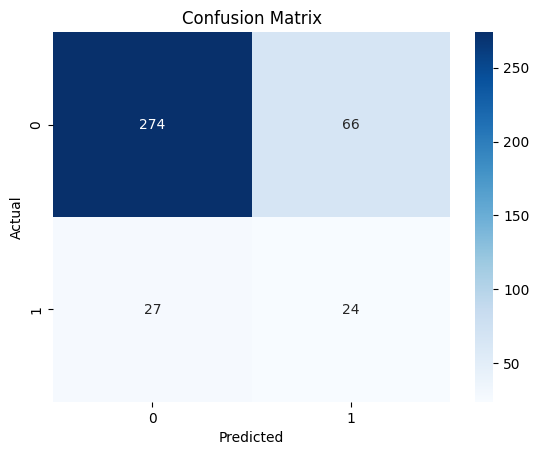

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Final submission.csv created with shape: (312, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
# ==================== IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Load data
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Target encode
train_df = train_df[train_df['age_group'].isin(['Adult', 'Senior'])].copy()
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

# Feature engineering
train_df['GLU_IN_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
test_df['GLU_IN_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)

train_df['BMI_Category'] = pd.cut(train_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])
test_df['BMI_Category'] = pd.cut(test_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

train_df = pd.get_dummies(train_df, columns=['BMI_Category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['BMI_Category'], drop_first=True)

# Column-wise missing value handling
# Categorical (use mode)
categorical_cols = ['RIAGENDR', 'PAQ605', 'DIQ010']
for col in categorical_cols:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Continuous numerical (use mean)
mean_cols = ['BMXBMI', 'LBXGLU', 'LBXGLT']
for col in mean_cols:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(train_df[col].mean(), inplace=True)

# Skewed numerical (use median)
skewed_cols = ['LBXIN']
for col in skewed_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(train_df[col].median(), inplace=True)

# Recompute derived feature
train_df['GLU_IN_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
test_df['GLU_IN_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)

# Fill missing for BMI one-hot
for col in [col for col in train_df.columns if "BMI_Category_" in col]:
    train_df[col].fillna(0, inplace=True)
    if col not in test_df:
        test_df[col] = 0
    test_df[col].fillna(0, inplace=True)

# Select feature columns
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
            'LBXGLT', 'LBXIN', 'GLU_IN_Ratio'] + \
           [col for col in train_df.columns if "BMI_Category_" in col]

# Extract features and target
X = train_df[features].values
X_test = test_df[features].values
y = train_df['age_group']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Feature selection (top 8 features)
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Define individual models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Voting ensemble
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('lr', lr)
], voting='soft')

# Train the ensemble
voting_clf.fit(X_train_bal, y_train_bal)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_selected, y, cv=5, scoring='accuracy')
print(f"\n 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Validation performance
y_val_pred = voting_clf.predict(X_val)
print("\n Validation Report:\n", classification_report(y_val, y_val_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final training on full data
X_full_bal, y_full_bal = smote.fit_resample(X_selected, y)
voting_clf.fit(X_full_bal, y_full_bal)

# Test predictions
final_predictions = voting_clf.predict(X_test_selected)

# Submission
submission = pd.DataFrame({'age_group': final_predictions})
submission.to_csv("submission.csv", index=False)
print(" Final submission.csv created with shape:", submission.shape)


/tmp/ipython-input-34-840266877.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-34-840266877.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

[LightGBM] [Info] Number of positive: 1298, number of negative: 1298
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1045
[LightGBM] [Info] Number of data points in the train set: 2596, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 252, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

 5-Fold CV Accuracy: 0.7843 ± 0.0139

 Validation Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.85       340
           1       0.27      0.47      0.34        51

    accuracy                           0.76       391
   macro avg       0.59      0.64      0.60       391
weighted avg       0.83      0.76      0.79       391



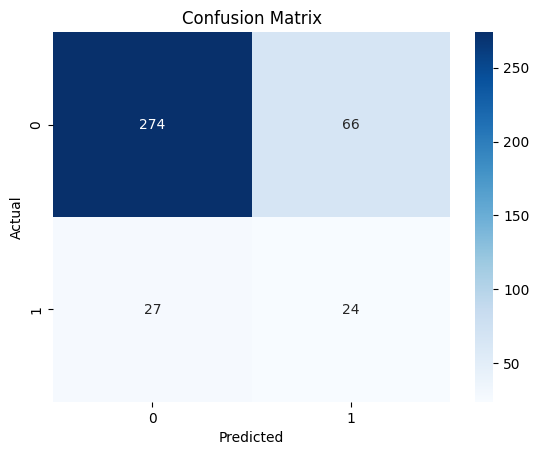

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Final submission.csv created with shape: (312, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# ==================== IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# ==================== LOAD DATA ====================
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Map target labels
train_df = train_df[train_df['age_group'].isin(['Adult', 'Senior'])].copy()
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

# ==================== FEATURE ENGINEERING ====================
train_df['GLU_IN_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
test_df['GLU_IN_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)

train_df['BMI_Category'] = pd.cut(train_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])
test_df['BMI_Category'] = pd.cut(test_df['BMXBMI'], [0,18.5,25,30,100], labels=['Underweight','Normal','Overweight','Obese'])

# One-hot encoding
train_df = pd.get_dummies(train_df, columns=['BMI_Category'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['BMI_Category'], drop_first=True)

# Align columns in case test set has missing dummy columns
for col in train_df.columns:
    if "BMI_Category_" in col and col not in test_df.columns:
        test_df[col] = 0
test_df = test_df[train_df.columns.drop('age_group')]

# ==================== HANDLE MISSING VALUES ====================
# Categorical - fill with mode
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Numerical (mean)
for col in ['BMXBMI', 'LBXGLU', 'LBXGLT']:
    train_df[col].fillna(train_df[col].mean(), inplace=True)
    test_df[col].fillna(train_df[col].mean(), inplace=True)

# Skewed numerical (median)
for col in ['LBXIN']:
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(train_df[col].median(), inplace=True)

# Recompute GLU_IN_Ratio after imputation
train_df['GLU_IN_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
test_df['GLU_IN_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)

# Final features
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
            'LBXGLT', 'LBXIN', 'GLU_IN_Ratio'] + \
           [col for col in train_df.columns if "BMI_Category_" in col]

X = train_df[features].values
X_test = test_df[features].values
y = train_df['age_group']

# ==================== SCALING & FEATURE SELECTION ====================
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)

# ==================== TRAINING & EVALUATION ====================
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('lr', lr)
], voting='soft')

voting_clf.fit(X_train_bal, y_train_bal)

# ==================== VALIDATION ====================
cv_scores = cross_val_score(voting_clf, X_selected, y, cv=5, scoring='accuracy')
print(f"\n 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

y_val_pred = voting_clf.predict(X_val)
print("\n Validation Report:\n", classification_report(y_val, y_val_pred))

sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==================== FINAL TRAINING AND PREDICTION ====================
X_full_bal, y_full_bal = smote.fit_resample(X_selected, y)
voting_clf.fit(X_full_bal, y_full_bal)

final_predictions = voting_clf.predict(X_test_selected)
submission = pd.DataFrame({'age_group': final_predictions.astype(int)})
submission.to_csv("submission.csv", index=False)
print(" Final submission.csv created with shape:", submission.shape)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1310, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1311
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:30:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1006
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1004
[LightGBM] [Info] Number of data points in the train set: 1561, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 252, number of negative: 1310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1002
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 251, number of negative: 1311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 1562, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

 5-Fold CV Accuracy: 0.7889 ± 0.0095

 Validation Report:
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.83       328
         1.0       0.29      0.46      0.36        63

    accuracy                           0.73       391
   macro avg       0.59      0.62      0.59       391
weighted avg       0.79      0.73      0.75       391



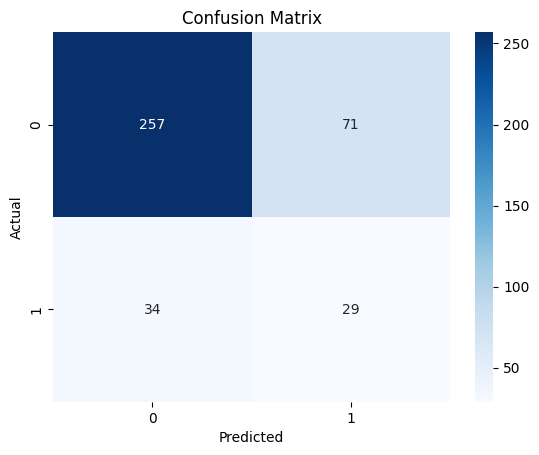

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:31:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1638, number of negative: 1638
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1300
[LightGBM] [Info] Number of data points in the train set: 3276, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
 Final submission.csv created with shape: (326, 1)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [38]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Load data
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Safely assign age_group using RIDAGEYR if available
if 'RIDAGEYR' in train_df.columns:
    train_df['age_group'] = (train_df['RIDAGEYR'] >= 65).astype(int)
elif 'age_group' in train_df.columns:
    train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})
else:
    raise ValueError("No valid column for generating age_group")

# Combine for consistent preprocessing
test_df['age_group'] = np.nan
full_df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

# Feature Engineering
full_df['GLU_IN_Ratio'] = full_df['LBXGLU'] / (full_df['LBXIN'] + 1)
full_df['BMI_Square'] = full_df['BMXBMI'] ** 2
full_df['GLU_IN_BMI'] = full_df['GLU_IN_Ratio'] / (full_df['BMXBMI'] + 1)
full_df['BMI_Category'] = pd.cut(full_df['BMXBMI'], [0, 18.5, 25, 30, 100],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

full_df['BMI_Category'] = full_df['BMI_Category'].astype(str).replace("nan", "Unknown")
full_df = pd.get_dummies(full_df, columns=['BMI_Category'], prefix='BMI')

# Split back into train and test
train_df = full_df[full_df['age_group'].notna()].copy()
test_df = full_df[full_df['age_group'].isna()].copy().drop(columns='age_group')

# Feature selection
features = ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
            'LBXGLT', 'LBXIN', 'GLU_IN_Ratio', 'BMI_Square', 'GLU_IN_BMI'] + \
           [col for col in full_df.columns if col.startswith('BMI_')]

X = train_df[features].copy()
X_test = test_df[features].copy()

# Ensure no NaNs remain after all transformations
X = X.fillna(X.mean())
X_test = X_test.fillna(X.mean())

y = train_df['age_group']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

# Select best features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

# Balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Classifiers
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(max_iter=1000, class_weight='balanced')

# Ensemble
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('lr', lr)
], voting='soft')

# Train
voting_clf.fit(X_train_bal, y_train_bal)

# Cross-validation
cv_scores = cross_val_score(voting_clf, X_selected, y, cv=5, scoring='accuracy')
print(f"\n 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Validation
y_val_pred = voting_clf.predict(X_val)
print("\n Validation Report:\n", classification_report(y_val, y_val_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Retrain on full balanced data
X_full_bal, y_full_bal = smote.fit_resample(X_selected, y)
voting_clf.fit(X_full_bal, y_full_bal)

# Final prediction
final_predictions = voting_clf.predict(X_test_selected)
submission = pd.DataFrame({'age_group': final_predictions.astype(int)})
submission.to_csv("submission.csv", index=False)
print(" Final submission.csv created with shape:", submission.shape)
